In [131]:
'''
https://medium.com/@brandonkessler/how-to-calculate-lifetime-value-of-your-customers-with-python-113f59385d91

https://www.kaggle.com/datasets/harunrai/fintech-customer-life-time-value-ltv-dataset
'''

'\nhttps://medium.com/@brandonkessler/how-to-calculate-lifetime-value-of-your-customers-with-python-113f59385d91\n\nhttps://www.kaggle.com/datasets/harunrai/fintech-customer-life-time-value-ltv-dataset\n'

In [132]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [133]:
df = pd.read_csv('digital_wallet_ltv_dataset.csv')
df.sample(5)

,Customer_ID,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
5995,cust_5995,24,Urban,Low,766,257.705365,682.853837,43.975399,1.974023e+05,93,185,593,37,1026.470155,Weekly,Credit Card,18,32.688432,8,3.211300e+04
114,cust_0114,23,Urban,High,48,5370.253152,7263.128718,1000.577259,2.577722e+05,336,335,3384,28,4830.960605,Weekly,UPI,10,44.464938,7,3.992973e+04
6612,cust_6612,26,Suburban,Middle,875,14455.682337,43390.606849,4336.854125,1.264872e+07,123,276,1805,12,4136.944059,Monthly,Credit Card,17,64.175562,3,1.270614e+06
997,cust_0997,41,Urban,Middle,901,13970.900976,33156.680756,1471.053530,1.258778e+07,113,5,1144,13,4125.890154,Weekly,Credit Card,8,65.213302,7,1.267303e+06
3395,cust_3395,33,Suburban,Middle,340,13782.961442,22241.935572,5487.101838,4.686207e+06,291,146,3649,33,1036.615759,Monthly,Debit Card,18,37.489280,2,4.807004e+05


In [134]:
df.shape

(7000, 20)

In [135]:
df.head()

,Customer_ID,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
0,cust_0000,54,Urban,Low,192,16736.384023,60216.834510,6525.814861,3.213386e+06,140,209,2114,25,2224.012140,Monthly,Debit Card,3,61.568590,1,3.279546e+05
1,cust_0001,67,Suburban,High,979,14536.734683,48350.100272,2186.742245,1.423146e+07,229,240,2960,20,4026.823518,Monthly,UPI,17,60.392889,8,1.437053e+06
2,cust_0002,44,Urban,High,329,7061.372800,32521.157187,2743.406808,2.323192e+06,73,21,3170,0,1441.011395,Monthly,Debit Card,11,45.305579,4,2.419387e+05
3,cust_0003,30,Rural,High,71,16426.876453,17827.896720,4360.784994,1.166308e+06,299,285,4756,35,4365.855580,Weekly,Wallet Balance,6,22.030191,1,1.284599e+05
4,cust_0004,58,Urban,Middle,878,10800.092660,17497.634534,4532.872520,9.482481e+06,236,329,1992,18,4161.523827,Daily,UPI,18,20.634723,5,9.569514e+05


In [136]:
df.describe()

,Age,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7.000000e+03
mean,42.633714,501.221429,9946.831482,30159.596784,2981.549953,5.002022e+06,181.934857,183.847714,2501.545429,24.837000,2496.525032,10.017571,36.528007,5.479000,5.119197e+05
std,15.516036,286.277311,5780.880831,21996.108793,2197.342161,4.390495e+06,105.102598,105.063709,1446.680026,14.560352,1440.651412,6.037067,20.389399,2.860197,4.390551e+05
min,16.000000,1.000000,10.185827,31.857484,4.617966,1.498144e+03,1.000000,1.000000,0.000000,0.000000,0.234349,0.000000,1.019853,1.000000,3.770495e+03
25%,29.000000,252.000000,4907.466790,12224.329366,1233.066226,1.363991e+06,90.000000,93.000000,1254.750000,12.000000,1269.423703,5.000000,19.127302,3.000000,1.482058e+05
50%,43.000000,506.000000,9841.172643,25469.392130,2473.181073,3.756105e+06,182.000000,184.000000,2466.000000,25.000000,2478.943350,10.000000,36.257396,5.000000,3.878180e+05
75%,56.000000,744.000000,14955.048801,44515.414177,4378.759195,7.645508e+06,273.000000,275.000000,3792.250000,37.000000,3749.375251,15.000000,54.068594,8.000000,7.748578e+05
max,69.000000,1000.000000,19996.445086,98809.241533,9917.028823,1.946773e+07,365.000000,365.000000,5000.000000,50.000000,4999.698480,20.000000,71.978946,10.000000,1.956988e+06


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  7000 non-null   object 
 1   Age                          7000 non-null   int64  
 2   Location                     7000 non-null   object 
 3   Income_Level                 7000 non-null   object 
 4   Total_Transactions           7000 non-null   int64  
 5   Avg_Transaction_Value        7000 non-null   float64
 6   Max_Transaction_Value        7000 non-null   float64
 7   Min_Transaction_Value        7000 non-null   float64
 8   Total_Spent                  7000 non-null   float64
 9   Active_Days                  7000 non-null   int64  
 10  Last_Transaction_Days_Ago    7000 non-null   int64  
 11  Loyalty_Points_Earned        7000 non-null   int64  
 12  Referral_Count               7000 non-null   int64  
 13  Cashback_Received 

In [138]:
def count_nulls_and_blanks(df):
    """
    Counts the number of null (NaN) and blank ("") values in a Pandas DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.

    Returns:
    pd.DataFrame: A DataFrame showing the count of nulls and blanks for each column.
    """
    null_counts = df.isna().sum()  # Count NaN values
    blank_counts = (df == "").sum()  # Count blank values
    result = pd.DataFrame({'Null Count': null_counts, 'Blank Count': blank_counts})
    return result


print("\nCount of Nulls and Blanks:")
print(count_nulls_and_blanks(df))



Count of Nulls and Blanks:
                             Null Count  Blank Count
Customer_ID                           0            0
Age                                   0            0
Location                              0            0
Income_Level                          0            0
Total_Transactions                    0            0
Avg_Transaction_Value                 0            0
Max_Transaction_Value                 0            0
Min_Transaction_Value                 0            0
Total_Spent                           0            0
Active_Days                           0            0
Last_Transaction_Days_Ago             0            0
Loyalty_Points_Earned                 0            0
Referral_Count                        0            0
Cashback_Received                     0            0
App_Usage_Frequency                   0            0
Preferred_Payment_Method              0            0
Support_Tickets_Raised                0            0
Issue_Resolution_T

In [139]:
# Check for duplicate Customer_ID values
duplicates = df[df.duplicated(subset='Customer_ID', keep=False)]

if duplicates.empty:
    print("No duplicate Customer_ID values found.")
else:
    print("Duplicate Customer_ID values found:")
    print(duplicates)


No duplicate Customer_ID values found.


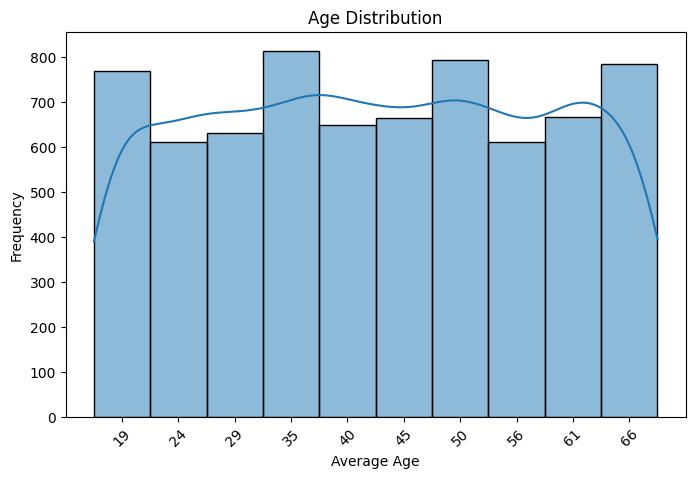

In [140]:
# Define number of bins
num_bins = 10

# Compute bin edges
bin_edges = np.linspace(df['Age'].min(), df['Age'].max(), num_bins + 1)

# Compute average values for each bin
bin_averages = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]
rounded_bin_averages = [round(avg) for avg in bin_averages]  # Round to the nearest integer

# Plot Seaborn Histogram
plt.figure(figsize=(8, 5))
ax = sns.histplot(df['Age'], bins=bin_edges, kde=True)

# Set x-axis ticks at bin centers with rounded average values
plt.xticks(bin_averages, [f'{avg}' for avg in rounded_bin_averages], rotation=45)

plt.xlabel('Average Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

plt.show()

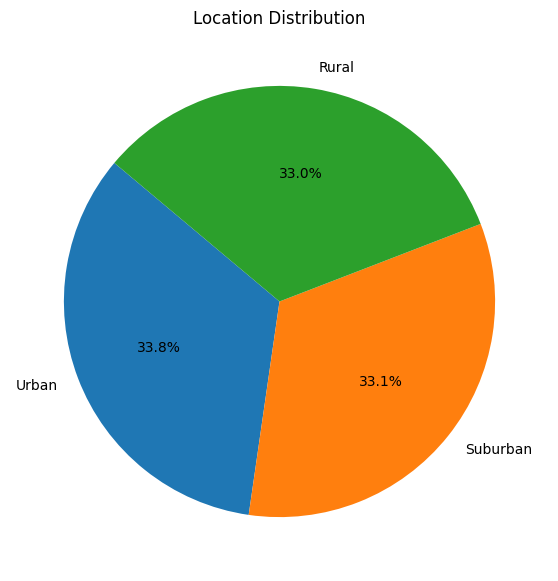

In [141]:
# Count occurrences of each location
location_counts = df['Location'].value_counts()

# Plot Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Location Distribution')
plt.show()


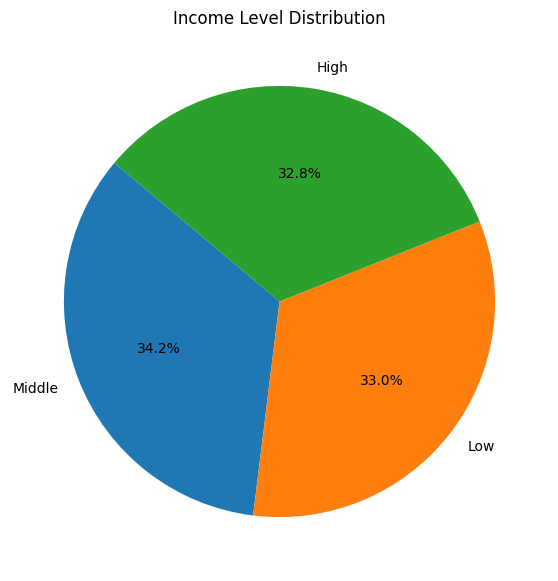

In [142]:
# Count occurrences of each income level
income_level_counts = df['Income_Level'].value_counts()

# Plot Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(income_level_counts, labels=income_level_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Income Level Distribution')
plt.show()

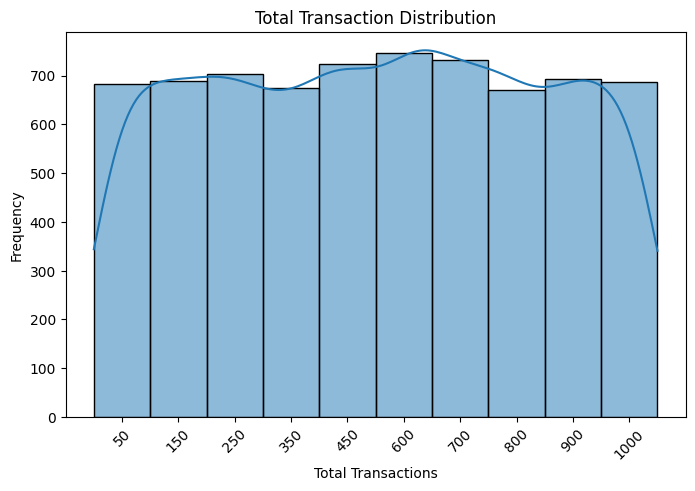

In [143]:
# Define number of bins
num_bins = 10

# Compute bin edges
bin_edges = np.linspace(df['Total_Transactions'].min(), df['Total_Transactions'].max(), num_bins + 1)

# Compute average values for each bin
bin_averages = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]

# Round to the nearest 10, 50, or 100
def round_custom(value):
    if value < 100:
        return round(value, -1)  # Round to nearest 10
    elif value < 500:
        return round(value, -1)  # Round to nearest 10 for mid-range values
    else:
        return round(value, -2)  # Round to nearest 100 for larger values

rounded_bin_averages = [round_custom(avg) for avg in bin_averages]

# Plot Seaborn Histogram
plt.figure(figsize=(8, 5))
ax = sns.histplot(df['Total_Transactions'], bins=bin_edges, kde=True)

# Set x-axis ticks at bin centers with rounded average values
plt.xticks(bin_averages, [f'{int(avg)}' for avg in rounded_bin_averages], rotation=45)

plt.xlabel('Total Transactions')
plt.ylabel('Frequency')
plt.title('Total Transaction Distribution')

plt.show()



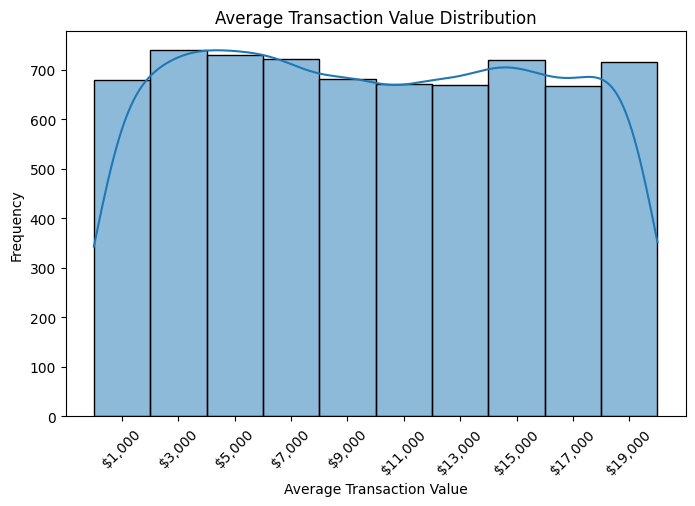

In [150]:
# Define number of bins
num_bins = 10

# Compute bin edges
bin_edges = np.linspace(df['Avg_Transaction_Value'].min(), df['Avg_Transaction_Value'].max(), num_bins + 1)

# Compute average values for each bin
bin_averages = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]

# Round to the nearest 1000
rounded_bin_averages = [round(avg, -3) for avg in bin_averages]  # Round to nearest 1000

# Plot Seaborn Histogram
plt.figure(figsize=(8, 5))
ax = sns.histplot(df['Avg_Transaction_Value'], bins=bin_edges, kde=True)

# Format x-axis as currency
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Set x-axis ticks at bin centers with rounded average values
plt.xticks(bin_averages, [f'${int(avg):,}' for avg in rounded_bin_averages], rotation=45)

plt.xlabel('Average Transaction Value')
plt.ylabel('Frequency')
plt.title('Average Transaction Value Distribution')

plt.show()

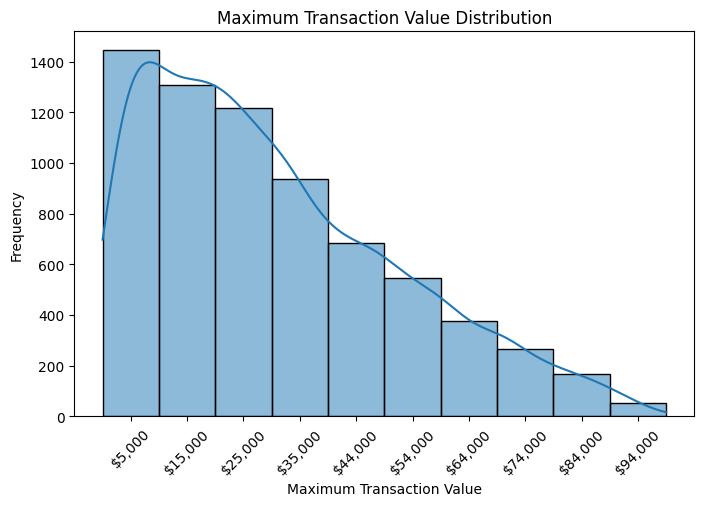

In [151]:
# Define number of bins
num_bins = 10

# Compute bin edges
bin_edges = np.linspace(df['Max_Transaction_Value'].min(), df['Max_Transaction_Value'].max(), num_bins + 1)

# Compute average values for each bin
bin_averages = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]

# Round each bin average to the nearest 1000
rounded_bin_averages = [round(avg, -3) for avg in bin_averages]  # Round to nearest 1000

# Plot Seaborn Histogram
plt.figure(figsize=(8, 5))
ax = sns.histplot(df['Max_Transaction_Value'], bins=bin_edges, kde=True)

# Format x-axis as currency
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Set x-axis ticks at bin centers with rounded average values
plt.xticks(bin_averages, [f'${int(avg):,}' for avg in rounded_bin_averages], rotation=45)

plt.xlabel('Maximum Transaction Value')
plt.ylabel('Frequency')
plt.title('Maximum Transaction Value Distribution')

plt.show()

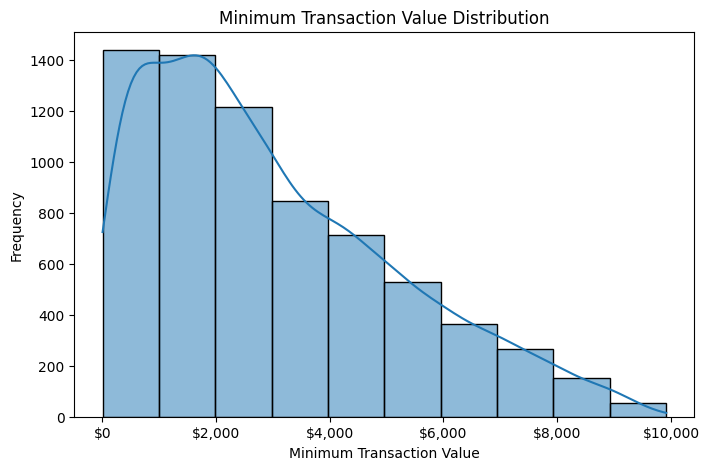

In [146]:
# Plot Seaborn Histogram
plt.figure(figsize=(8, 5))
ax = sns.histplot(df['Min_Transaction_Value'], bins=10, kde=True)

# Format x-axis as currency
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.xlabel('Minimum Transaction Value')
plt.ylabel('Frequency')
plt.title('Minimum Transaction Value Distribution')
plt.show()

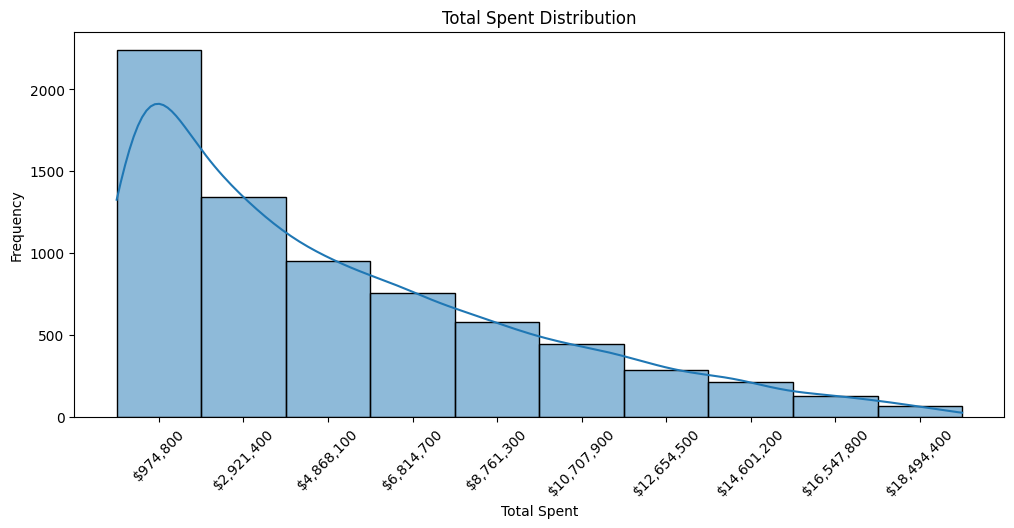

In [147]:
# Define number of bins
num_bins = 10

# Compute bin edges
bin_edges = np.linspace(df['Total_Spent'].min(), df['Total_Spent'].max(), num_bins + 1)

# Compute average values for each bin
bin_averages = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]
rounded_bin_averages = [round(avg, -2) for avg in bin_averages]  # Round to nearest hundred

# Plot Seaborn Histogram
plt.figure(figsize=(12, 5))
ax = sns.histplot(df['Total_Spent'], bins=bin_edges, kde=True)

# Format x-axis as currency
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Set x-axis ticks at bin centers with rounded average values
plt.xticks(bin_averages, [f'${int(avg):,}' for avg in rounded_bin_averages], rotation=45)

plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.title('Total Spent Distribution')

plt.show()


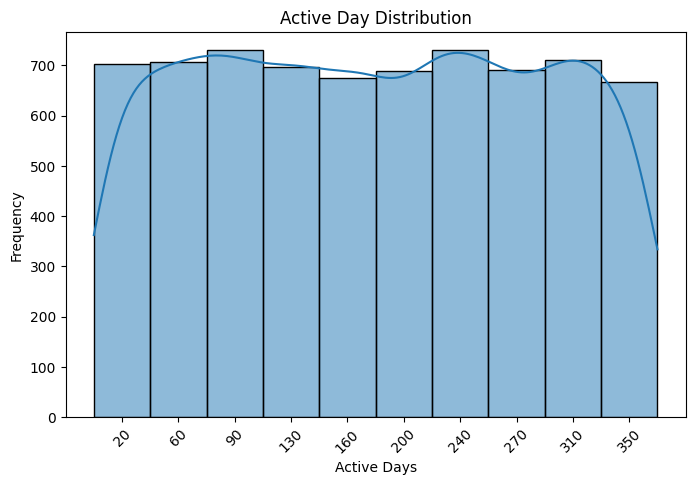

In [152]:
# Define number of bins
num_bins = 10

# Compute bin edges
bin_edges = np.linspace(df['Active_Days'].min(), df['Active_Days'].max(), num_bins + 1)

# Compute average values for each bin
bin_averages = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]

# Round each bin average to the nearest 10
rounded_bin_averages = [round(avg, -1) for avg in bin_averages]  # Round to nearest 10

# Plot Seaborn Histogram
plt.figure(figsize=(8, 5))
ax = sns.histplot(df['Active_Days'], bins=bin_edges, kde=True)

# Set x-axis ticks at bin centers with rounded average values
plt.xticks(bin_averages, [f'{int(avg)}' for avg in rounded_bin_averages], rotation=45)

plt.xlabel('Active Days')
plt.ylabel('Frequency')
plt.title('Active Day Distribution')

plt.show()